In [1]:
import pandas as pd
import os
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from datetime import datetime, timedelta

In [2]:
relative_path  = "../data/beijing+multi+site+air+quality+data/PRSA_Data_20130301-20170228"

In [3]:
df = pd.read_csv(filepath_or_buffer = os.path.join(relative_path, "PRSA_Data_Guanyuan_20130301-20170228.csv"))
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
35060,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
35061,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
35062,35063,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan


In [4]:
def calculate_aqi(row):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    max_value = row[pollutants].max()
    
    if max_value <= 50:
        return 'Excelent'
    elif max_value <= 100:
        return 'Good'
    elif max_value <= 150:
        return 'Slightly Polluted'
    elif max_value <= 200:
        return 'Lightly Polluted'
    elif max_value <= 250:
        return 'Moderately Polluted'
    elif max_value <= 300:
        return 'Heavily Polluted'
    else:
        return 'Severely Polluted'
    
df['AQI'] = df.apply(calculate_aqi, axis=1)

In [5]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan,Heavily Polluted
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan,Heavily Polluted
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan,Heavily Polluted
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan,Severely Polluted
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan,Severely Polluted


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
 18  AQI      35064 non-null  object 
dtypes: float64(11), int64(5), object(3)
memory usage: 5.1+ MB


In [7]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [8]:
print(f'No Entradas: {df.shape[0]}, No Columnas: {df.shape[1]}')

No Entradas: 35064, No Columnas: 19


In [9]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
AQI           0
dtype: int64

In [10]:
print('Porcentaje de Nulos\n',round(df.isnull().sum()/len(df.index), 2)*100)

Porcentaje de Nulos
 No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      2.0
PM10       1.0
SO2        1.0
NO2        2.0
CO         5.0
O3         3.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
AQI        0.0
dtype: float64


In [11]:
df['wd'].unique()

array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE',
       'WNW', 'SSE', 'ESE', 'S', 'SW', nan], dtype=object)

In [12]:
df['station'].unique()

array(['Guanyuan'], dtype=object)

In [13]:
df['AQI'].unique()

array(['Heavily Polluted', 'Severely Polluted', 'Good',
       'Lightly Polluted', 'Slightly Polluted', 'Moderately Polluted',
       'Excelent'], dtype=object)

In [14]:
columnas_a_excluir = ['wd', 'station','AQI']
df1 = df
df = df.drop(columnas_a_excluir, axis=1)


In [15]:
sesgo = df.mean() - df.median()
print("Segos Positivos y Negavitos\n",sesgo)

Segos Positivos y Negavitos
 No         0.000000
year      -0.337440
month     -0.477070
day       -0.270363
hour       0.000000
PM2.5     23.933372
PM10      20.023303
SO2        9.590941
NO2        6.901643
CO       371.294377
O3        14.795044
TEMP      -0.915393
PRES       0.446920
DEWP      -0.676938
RAIN       0.067421
WSPM       0.308496
dtype: float64


In [16]:
moda = df.mode().iloc[0]
media = df.mean()
mediana = df.median()

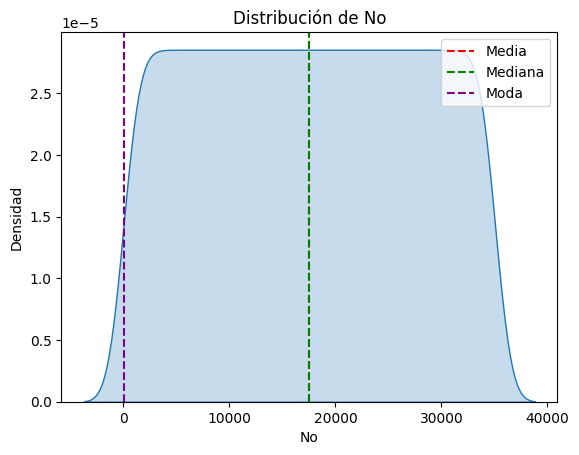

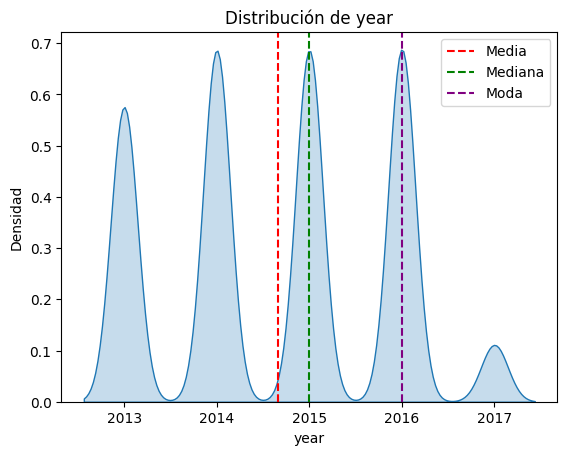

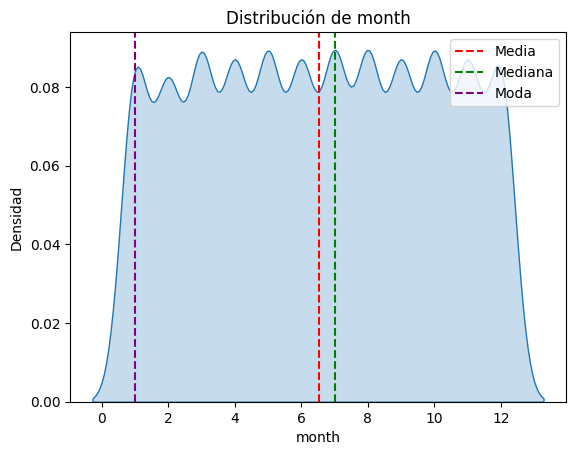

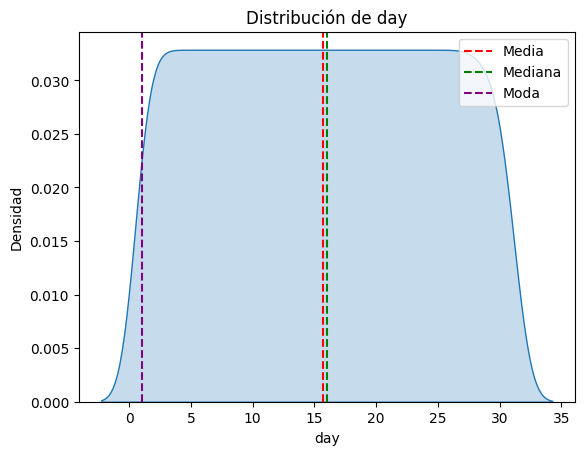

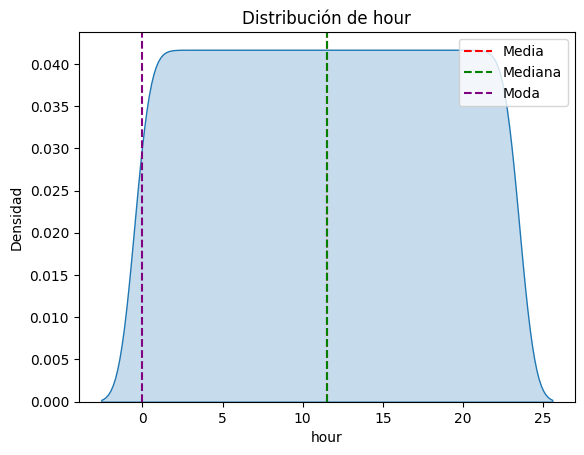

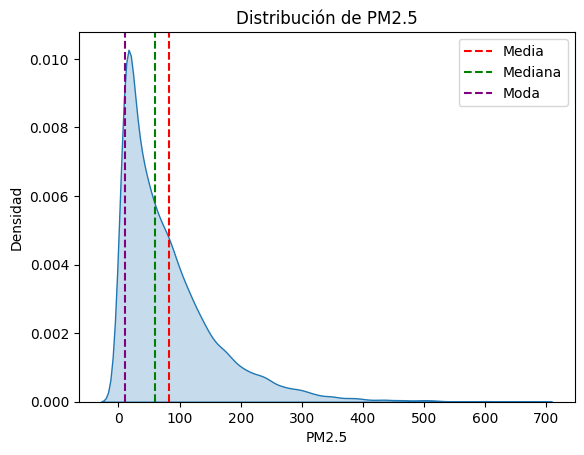

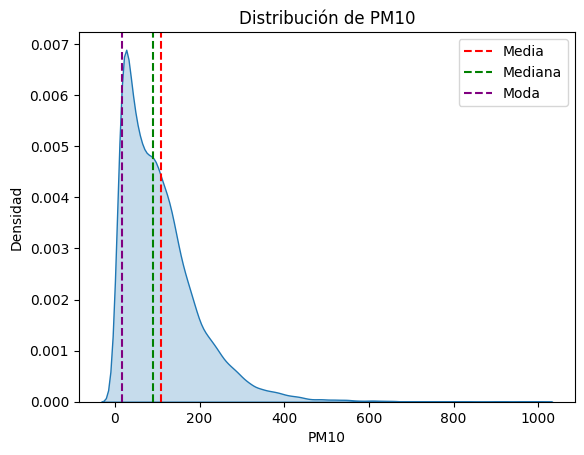

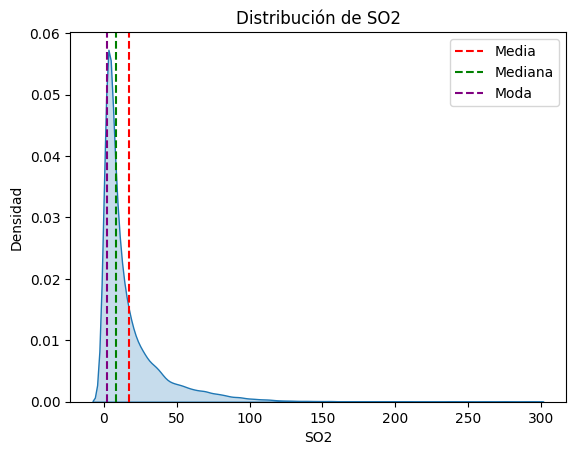

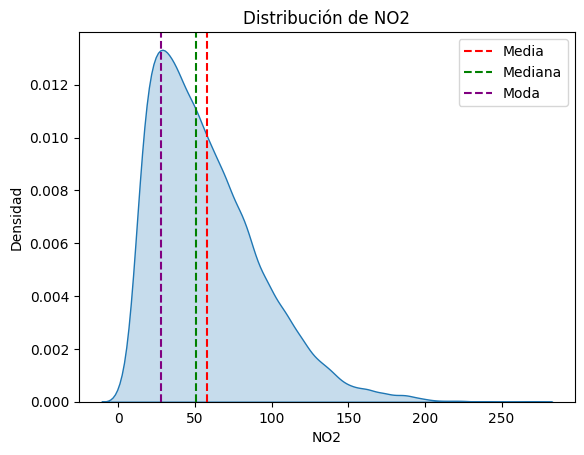

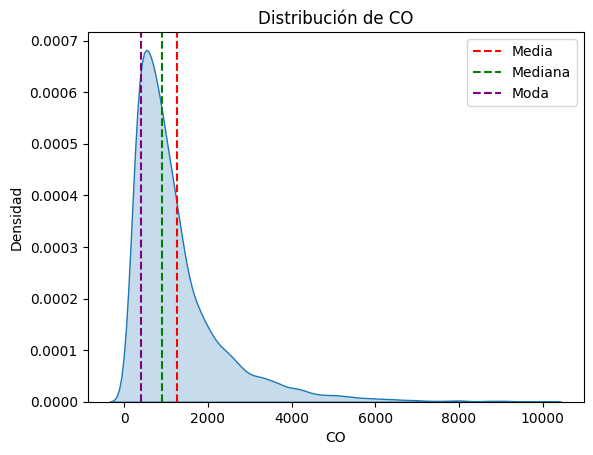

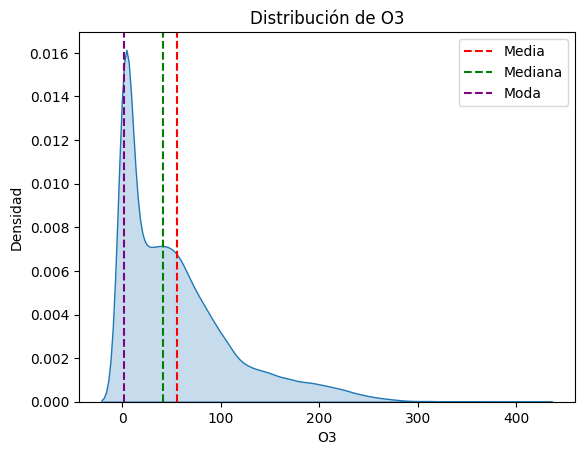

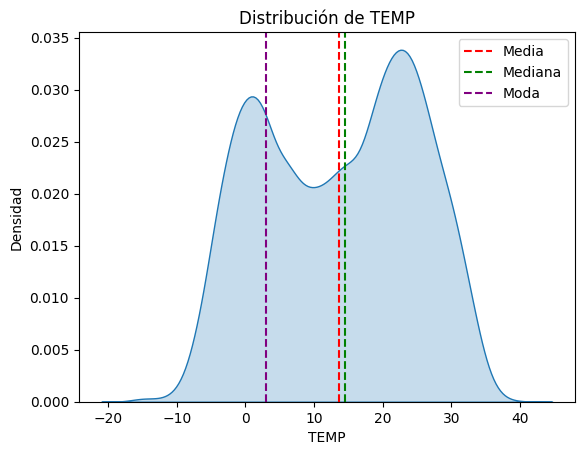

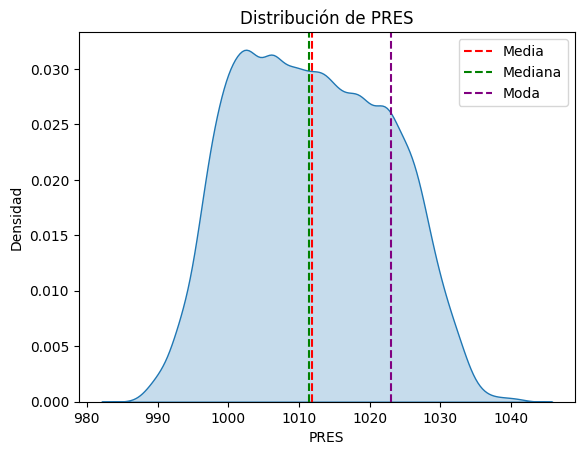

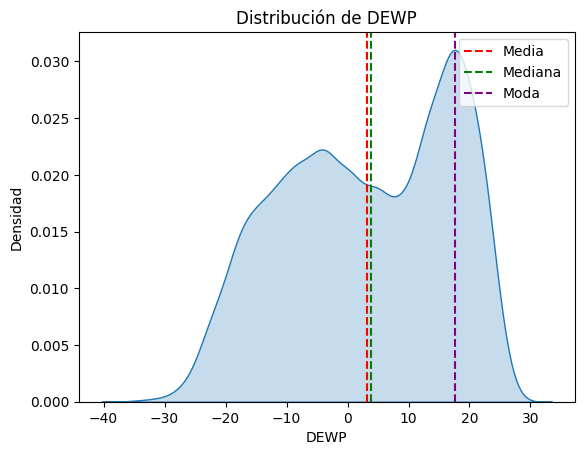

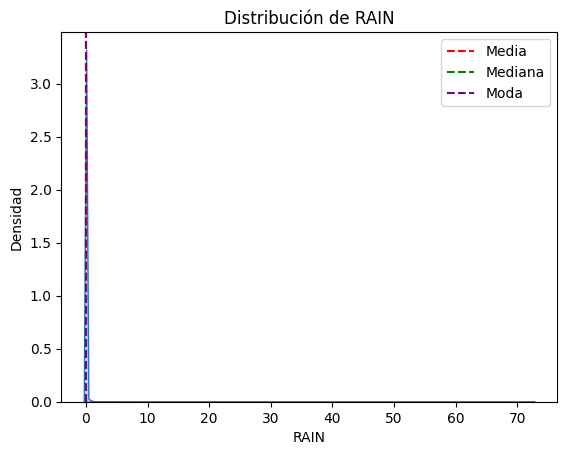

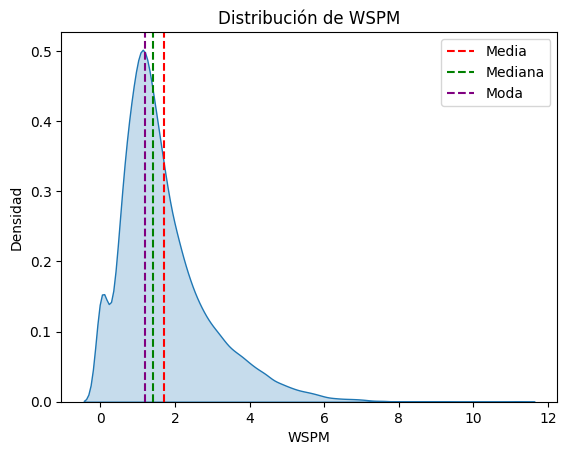

In [17]:
for columna in df.columns:
    plt.figure()
    sns.kdeplot(df[columna], fill=True)
    plt.axvline(x=media[columna], color='red', linestyle='--', label='Media')
    plt.axvline(x=mediana[columna], color='green', linestyle='--', label='Mediana')
    plt.axvline(x=moda[columna], color='purple', linestyle='--', label='Moda')
    plt.xlabel(columna)
    plt.ylabel('Densidad')
    plt.title(f'Distribución de {columna}')
    plt.legend()
    plt.show()

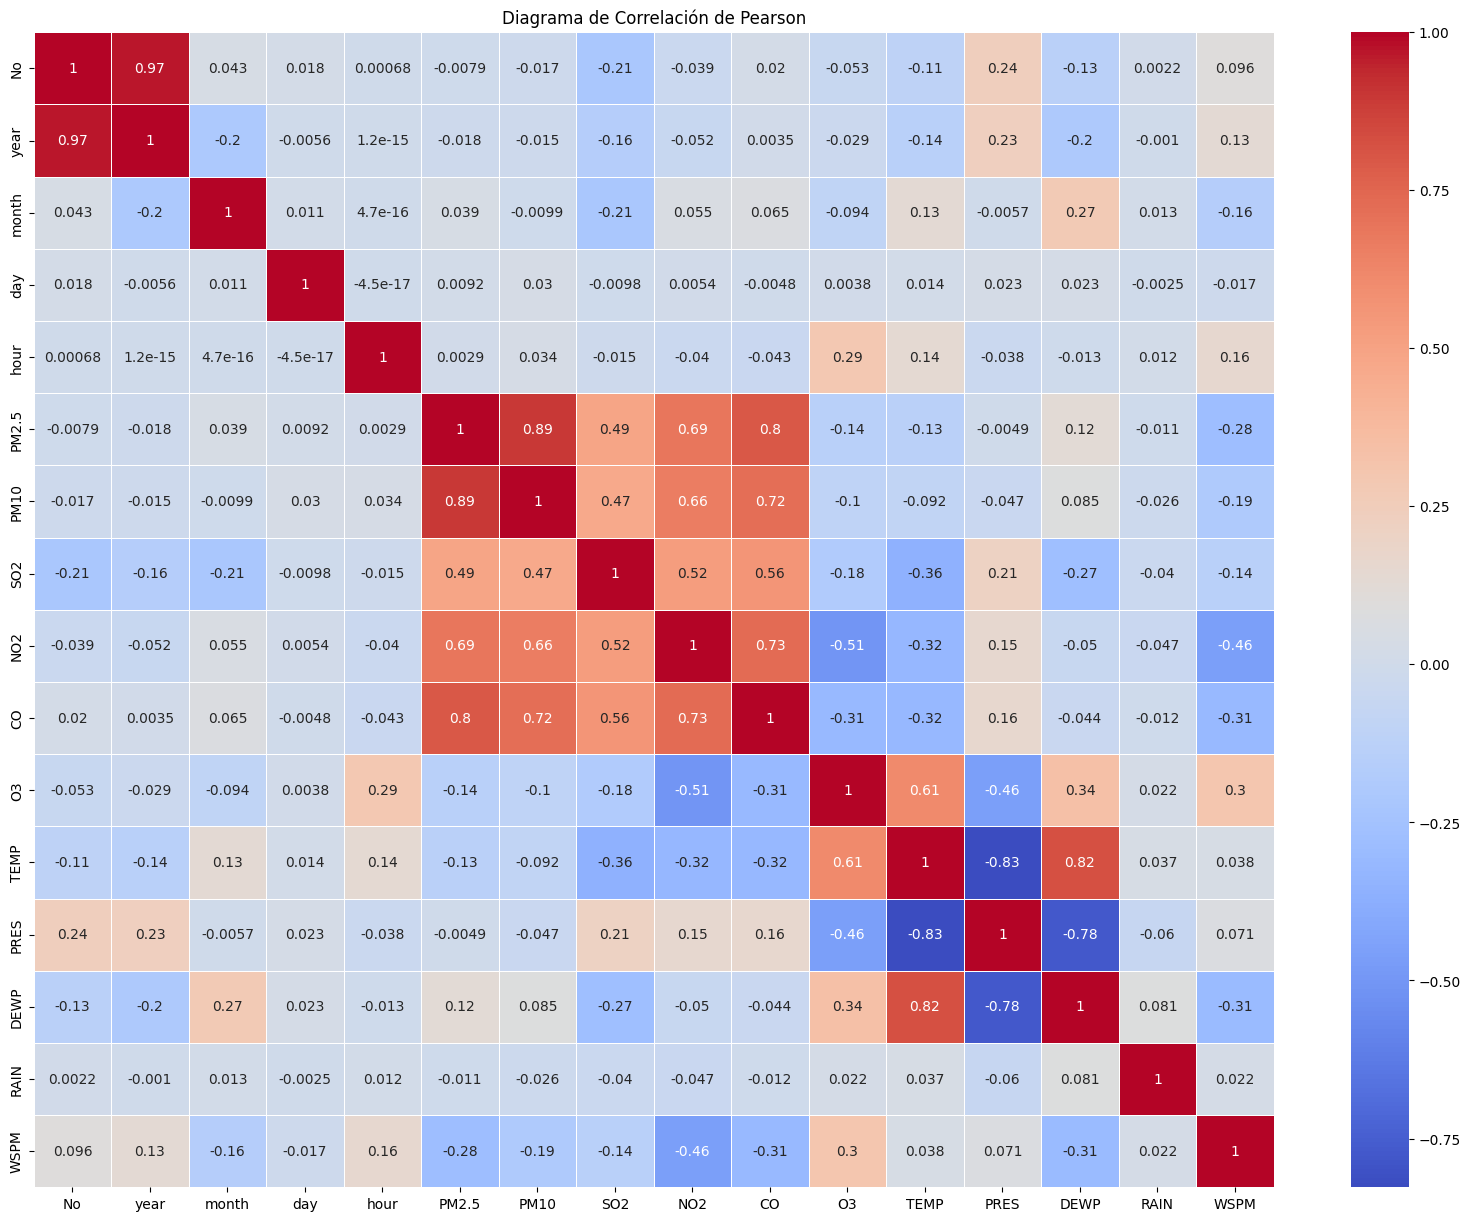

In [18]:
# Calcular la matriz de correlación de Pearson
correlation_matrix = df.corr(method='pearson')

# Crear un mapa de calor
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Diagrama de Correlación de Pearson')
plt.show()

In [19]:
df = df1

In [20]:
df['PM2.5'].describe()

count    34448.000000
mean        82.933372
std         80.933497
min          2.000000
25%         23.000000
50%         59.000000
75%        115.000000
max        680.000000
Name: PM2.5, dtype: float64

In [21]:
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)

In [22]:
print('Porcentaje de Nulos\n',round(df.isnull().sum()/len(df.index), 2)*100)

Porcentaje de Nulos
 No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       1.0
SO2        1.0
NO2        2.0
CO         5.0
O3         3.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
AQI        0.0
dtype: float64


In [23]:
df['PM10'].fillna(df['PM10'].median(), inplace=True)
df['SO2'].fillna(df['SO2'].median(), inplace=True)
df['NO2'].fillna(df['NO2'].median(), inplace=True)
df['CO'].fillna(df['CO'].median(), inplace=True)
df['O3'].fillna(df['O3'].median(), inplace=True)

In [24]:
print('Porcentaje de Nulos\n',round(df.isnull().sum()/len(df.index), 2)*100)

Porcentaje de Nulos
 No         0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
AQI        0.0
dtype: float64


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
 18  AQI      35064 non-null  object 
dtypes: float64(11), int64(5), object(3)
memory usage: 5.1+ MB


In [31]:
columns_all = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'gray', 'brown']

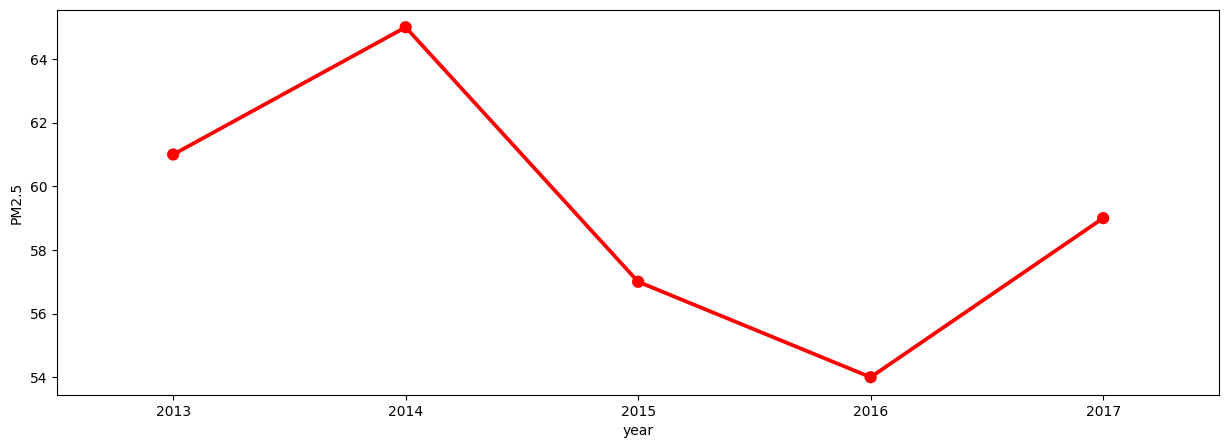

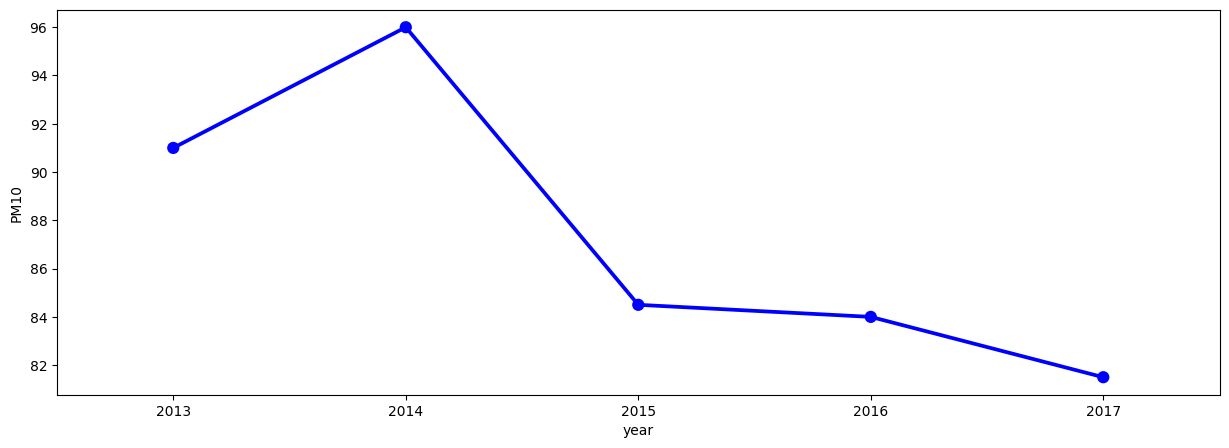

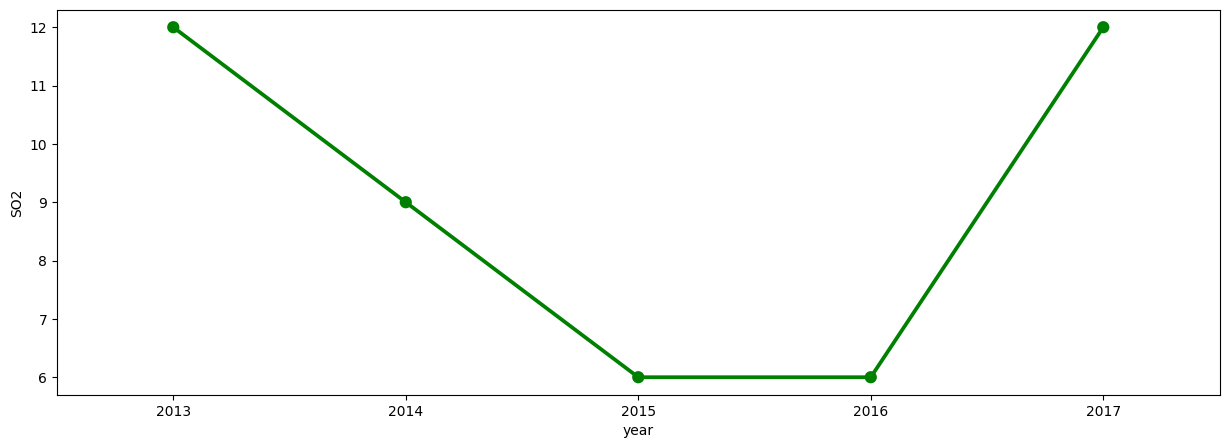

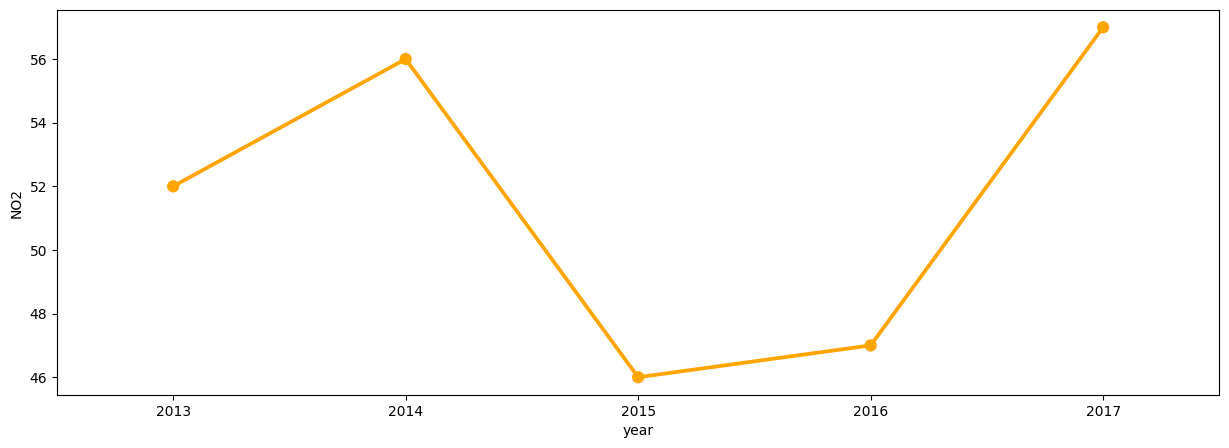

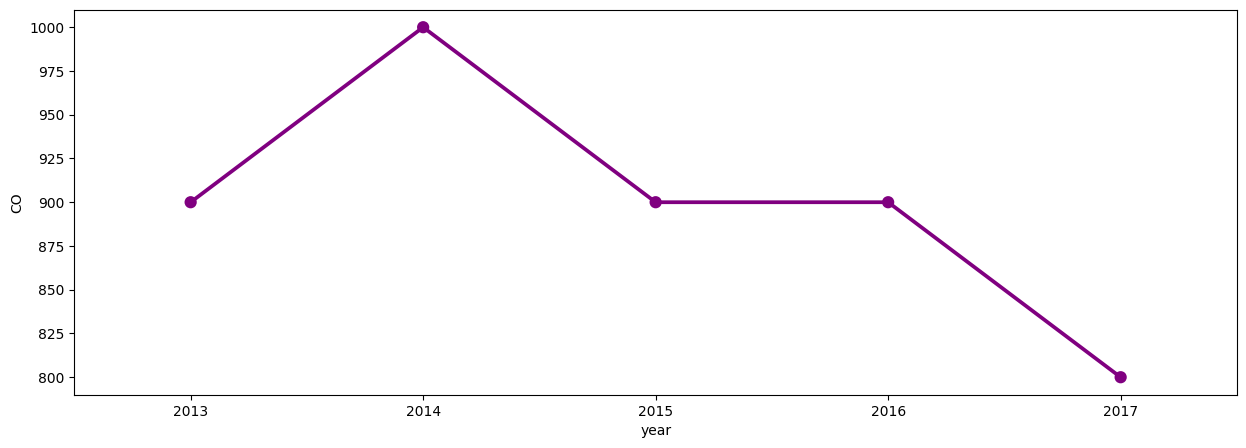

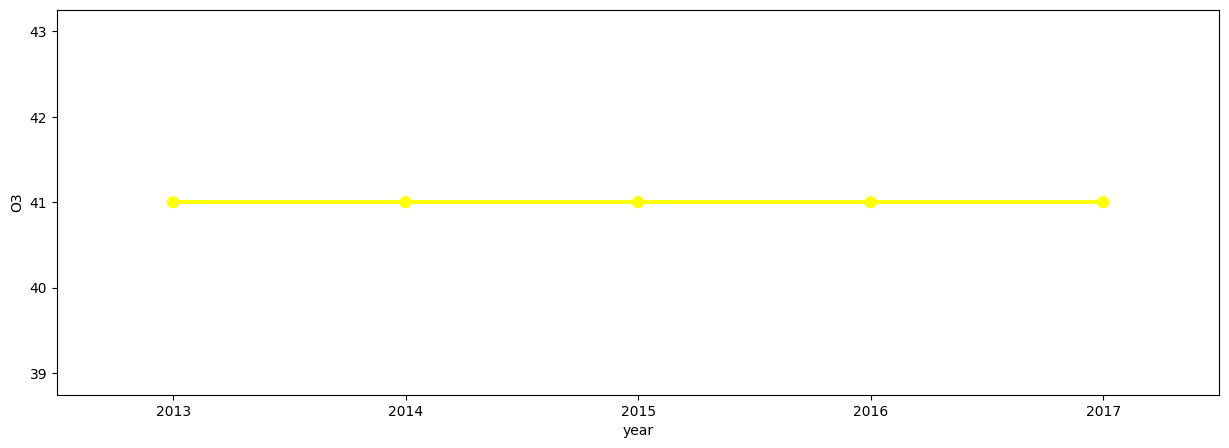

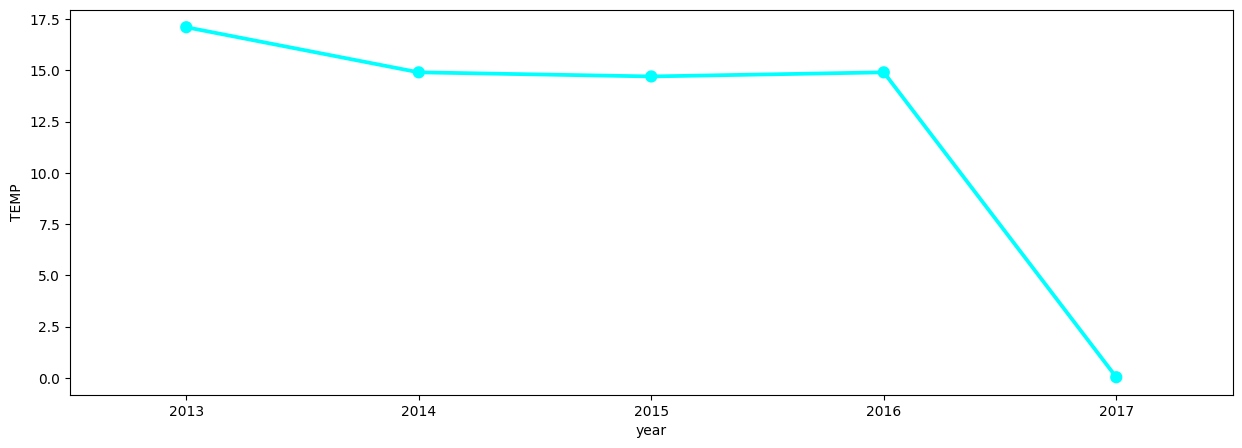

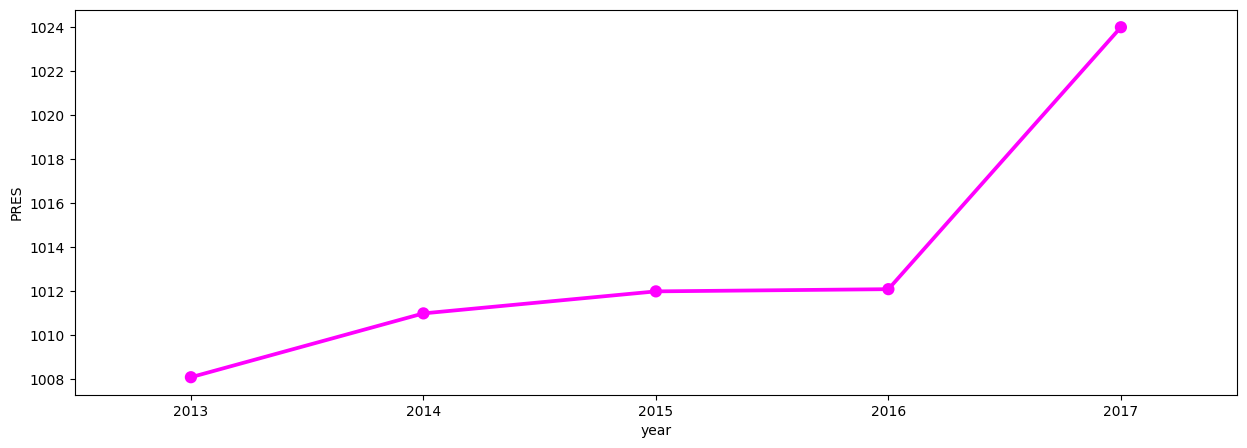

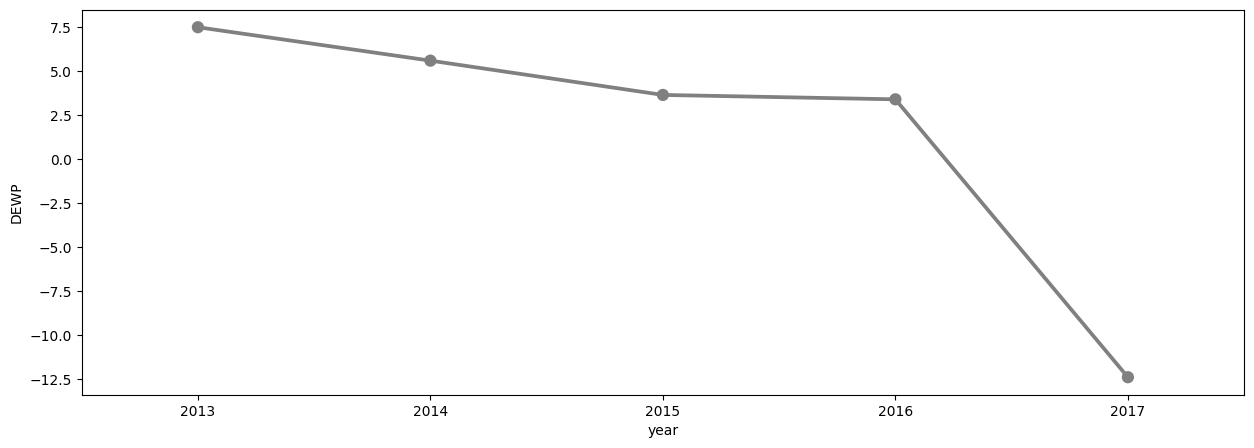

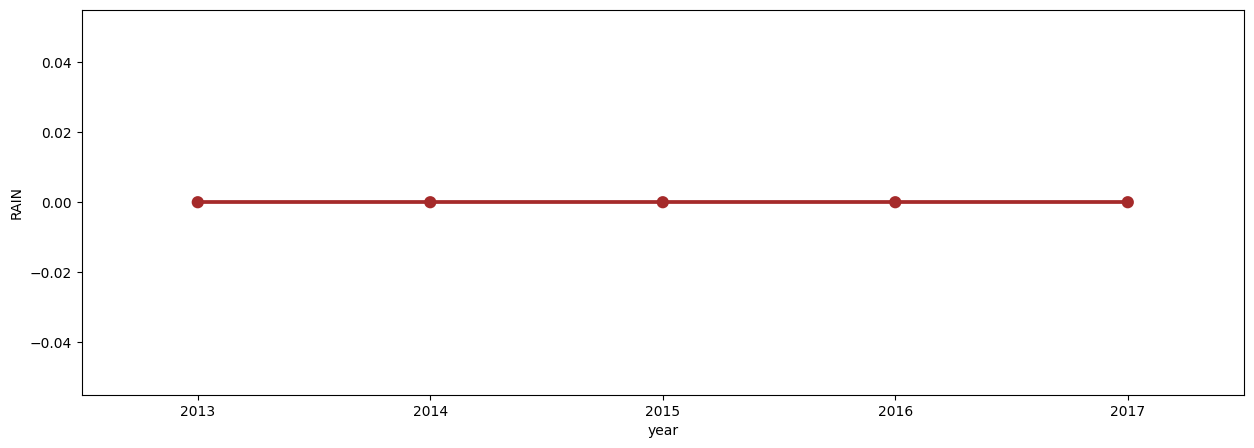

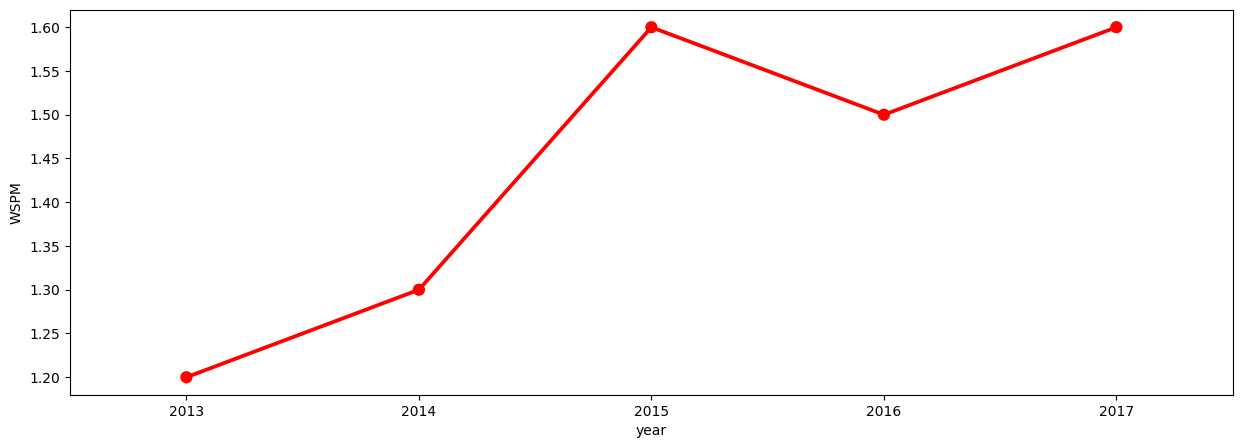

In [32]:
for i, colum in enumerate(columns_all):
    df_aux = df[[colum,'year']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x='year', y=str(colum), data=df_aux, markers='o', color=colors[i % len(colors)])